# RECLAC package: tutorial
<font size="4"> 
The following tutorial provides an overview of the basic functionalities of the RECLAC package. Recurrence plots, box-counting dimensions and recurrence lacunarity are computed based on six example time series with reference to figure 2 in:

### Braun, Tobias, et al. "Detection of dynamical regime transitions with lacunarity as a multiscale recurrence quantification measure." Nonlinear Dynamics (2021): 1-19.

<font size="4"> 
This demonstration includes:
<ol>      
<li> Generating and quantifying recurrence plots with standard RQA measures
    
<li> Computation of box-counting dimensions
    
<li> Computation of recurrence lacunarity
</ol>

<font size="4"> Import the packages and the time series examples:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import both modules from the RECLAC package
import RECLAC.recurrence_plot as rec
import RECLAC.boxcount as bc
fs = 18

# example data
a_data = np.load('/home/tobraun/Desktop/exmpl_time_series.npy')

## This data set contains six different exemplary systems whereas each exhibits distinct dynamics and characteristic time scales:
<font size="4"> 
<ol>      
<li> White noise: stochastic and uncorrelated
<li> Logistic map: chaotic regime ($r=3.9$)
<li> Roessler system: x-component, periodic regime ($a=0.2,\, b=0.2,\, c=3$)
<li> ARIMA-process: correlated noise ($a=1,\, b=-1,\, c=0.5$)
<li> Mulifractal Brownian motion: correlated noise with varying Hurst exponents ($h(t) = 0.25\mathrm{sin}(40t) + 0.5$)
<li> Noise-driven bimodal system: stochastic and deterministic with double-well potential
</ol>

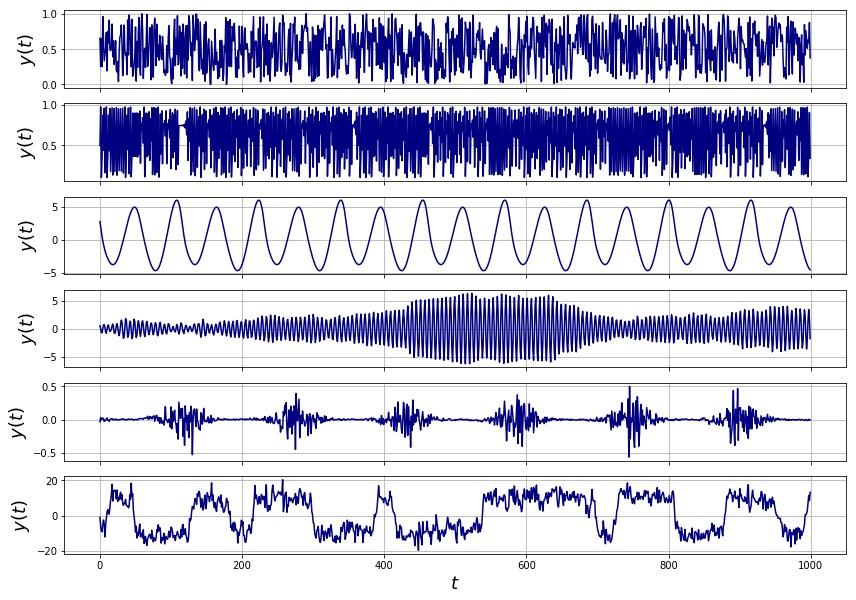

In [2]:
fig, ax = plt.subplots(nrows=6, figsize=(14, 10))
for i in range(6):
    ax[i].plot(a_data[i,], color='navy')
    ax[i].grid()
    ax[i].set_ylabel('$y(t)$', fontsize=fs)
    if i<5: 
        ax[i].set_xticklabels([])
    else:
        ax[i].set_xlabel('$t$', fontsize=fs)

<font size="4"> 
$\textbf{1. Recurrence plots}$: generating and quantifying recurrence plots with standard RQA measures.

A recurrence plot object is defined for the logistic map time series. In this case, we fix the recurrence rate to $10\%$ and do not apply any embedding. The recurrence matrix attribute rm() extracts the recurrence matrix.

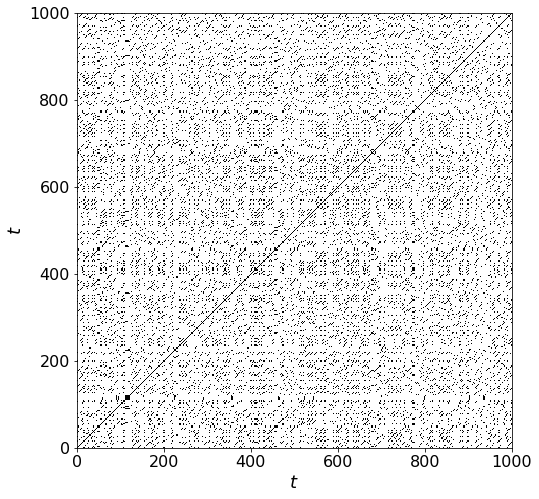

In [3]:
# Define a recurrence plot object from the white noise time series
RP = rec.RP(a_data[1,], method='frr', thresh=.1)

# extract the recurrence matrix via the attribute rm():
a_rm_wn = RP.rm()

# plot it
a_ticks = np.arange(0, 1200, 200)
fig = plt.figure(figsize=(8,8))
plt.imshow(a_rm_wn, origin='lower', cmap='binary')
plt.xlabel('$t$', fontsize=fs)
plt.ylabel('$t$', fontsize=fs)
plt.xticks(a_ticks, fontsize=fs-2);
plt.yticks(a_ticks, fontsize=fs-2);

<font size="4"> 
Generate a recurrence matrix for each time series in the data set:

In [4]:
# create a list of RP objects:
l_RP = [rec.RP(a_data[i,], method='frr', thresh=.1) for i in range(6)]
# the Roessler time series needs to be embedded:
l_RP[2] = rec.RP(a_data[2,], dim=3, tau=14, method='frr', thresh=.1)

# Extract the recurrence matrices:
l_rm = [l_RP[i].rm() for i in range(6)]

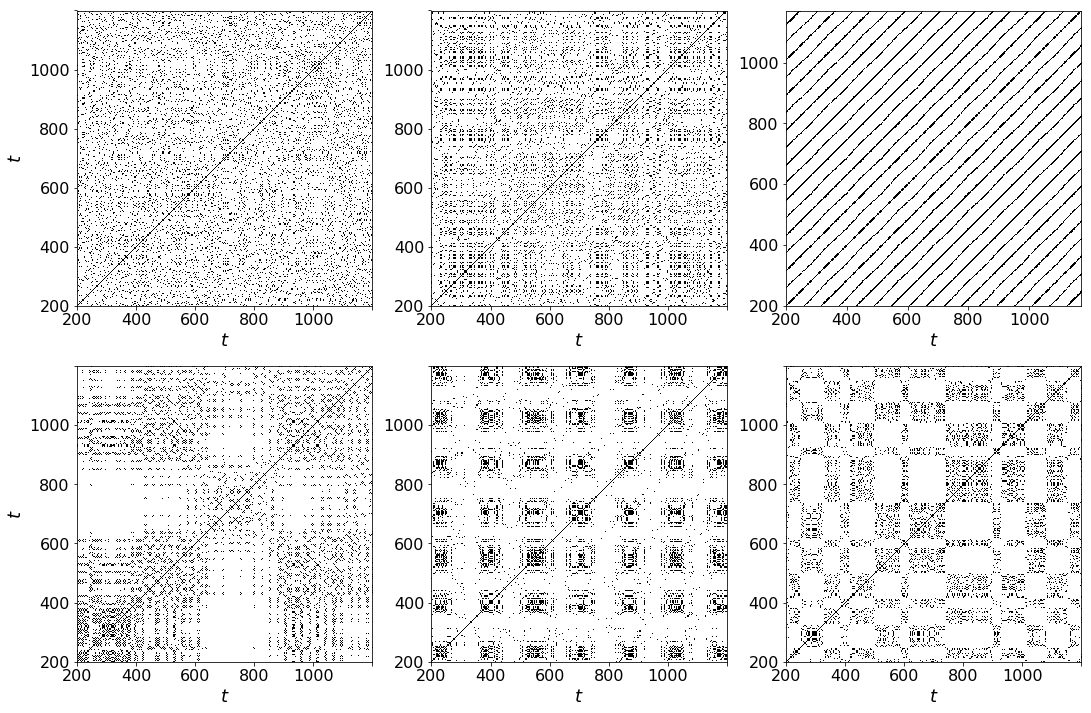

In [5]:
fig, ax_array = plt.subplots(2, 3, squeeze=False, figsize=(18, 12))
k = 0
for i, ax_row in enumerate(ax_array):
    for j, axes in enumerate(ax_row):
        axes.imshow(l_rm[k], origin='lower', cmap='binary')
        axes.set_xticklabels(np.arange(0, 1200, 200), fontsize=fs-2);
        axes.set_yticklabels(np.arange(0, 1200, 200), fontsize=fs-2);
        axes.set_xlabel("$t$", fontsize=fs)
        if k == 0 or k == 3: axes.set_ylabel("$t$", fontsize=fs)
        k += 1
plt.show()

<font size="4"> 
$\textbf{Recurrence quantification analysis:}$

The RECLAC package provides a (limited) selection of standard recurrence quantification measures. In particular, it computes the diagonal, vertical and white vertical line length distributions. From these distributions, the following measures can be computed:

<ol>      
<li> recurrence rate: 'RR'
    
<li> determinism: 'DET'
    
<li> average diagonal line length: 'avgDL'
    
<li> maximum diagonal line length: 'maxDL'
    
<li> laminarity: 'LAM'

<li> average vertical line length: 'avgWVL'

<li> maximum vertical line length: 'maxWVL'
</ol>

<font size="4"> 
The recurrence quantification analysis can be carried out using the 'RQA()'-attribute. We compute all recurrence quantifiers for the noise-driven bimodal system whereas we consider all measures (measures = 'all') and do not apply any treatment do border lines. It returns a dictionary:

In [6]:
# generate RP object
RP = l_RP[5]
# compute all RQA measures and print them:
d_rqa = RP.RQA(lmin=2, measures = 'all', border=None)
print(d_rqa)

{'RR': 0.1, 'DET': 0.41945454545454547, 'avgDL': 2.3139418254764292, 'maxDL': 10, 'LAM': 0.526675868691112, 'avgVL': 2.473971058071791, 'maxVL': 9, 'avgWVL': 16.76159984799544, 'maxWVL': 742}


<font size="4"> 
Single values can be extracted easily:

In [7]:
print('The percent determinism is ' + str(np.round(100*d_rqa['DET'],2)) + '%.')

The percent determinism is 41.95%.


<font size="4"> 
Discarding border lines has a significant impact on the line length distribution:

In [8]:
# Roessler RP:
RP = l_RP[2]

# without any action on the border lines
a_ll1, a_bins1, a_freqs1 = RP.line_hist(linetype='diag', border=None)
# discarding all border lines
a_ll2, a_bins2, a_freqs2 = RP.line_hist(linetype='diag', border='discard')

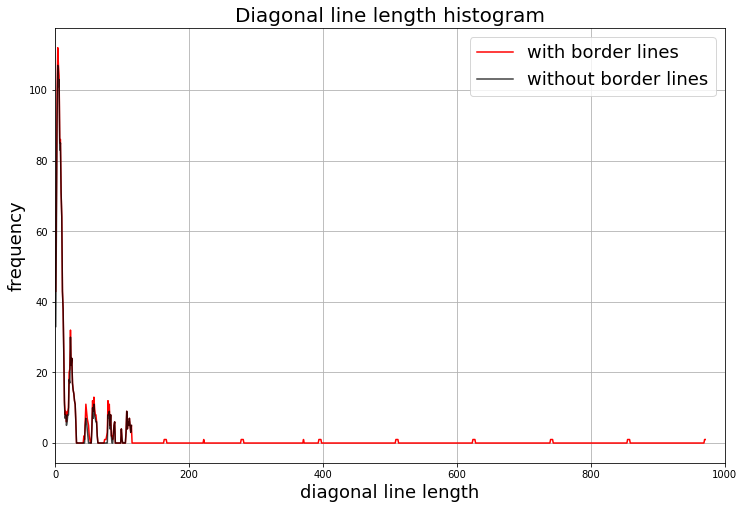

In [9]:
fig = plt.figure(figsize=(12, 8))
plt.plot(a_bins1[1:] - 0.5, a_freqs1, color='red', label='with border lines')
plt.plot(a_bins2[1:] - 0.5, a_freqs2, color='black', alpha=.75, label='without border lines')
plt.xlim(0, 1000)
plt.grid()
plt.xlabel('diagonal line length', fontsize=fs)
plt.ylabel('frequency', fontsize=fs)
plt.title('Diagonal line length histogram', fontsize=fs+2)
plt.legend(fontsize=fs)

In [10]:
l_rqa = [l_RP[i].RQA(lmin=2) for i in range(6)]
# collect measures for comparison
l_det = [l_rqa[i]['DET'] for i in range(6)]
l_lam = [l_rqa[i]['LAM'] for i in range(6)]
l_rt = [l_rqa[i]['avgWVL'] for i in range(6)]
# systems:
l_sys = ['wn', 'logmap', 'roessler', 'AR2', 'MFGN', 'bimodal']


Text(0.5, 1.0, 'Avg. recurrence time')

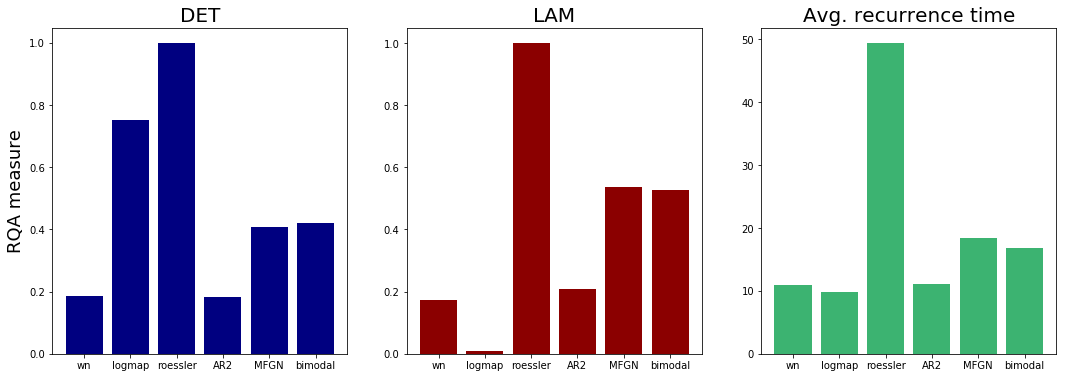

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 6))
ax[0].bar(l_sys, l_det, color='navy')
ax[0].set_title('DET', fontsize=fs+2)
ax[0].set_ylabel('RQA measure', fontsize=fs)
ax[1].bar(l_sys, l_lam, color='darkred')
ax[1].set_title('LAM', fontsize=fs+2)
ax[2].bar(l_sys, l_rt, color='mediumseagreen')
ax[2].set_title('Avg. recurrence time', fontsize=fs+2)

## __________________________________________________________________












<font size="4"> 
$\textbf{2. Box-counting}$: computing box-counting dimensions and recurrence lacunarity.

The module 'boxcount' offers a static and a gliding box-counting algorithm. The resulting box mass distribution is used to compute the box-counting dimension and lacunarity of a recurrence matrix. It can even be applied to arbitrary binary 2D-matrices (or externally computed RPs) as input if the 'compute_rp' argument is set to False.

<font size="4"> 
Generate a static grid with equally sized boxes to cover a recurrence matrix. As both measures are computed from log-log plot, we use logarithmic spacing:

In [2]:
bmin, bmax = 2, 250
nb = 100
a_boxes = np.logspace(np.log10(bmin), np.log10(bmax), nb, dtype=int)

<font size="4"> 
$\textbf{Box-counting dimension:}$
    
    
Select a system and compute its box-counting dimension. Parameters must be specified both for generating the recurrence matrix and carrying out the box-counting procedure:

In [3]:
a_ts = a_data[5,]
BC = bc.Boxcount(a_ts, method='frr', thresh=.1, boxes=a_boxes)
# compute box-counts
_, a_nboxes = BC.box_dimension(regression=None)
# calculate the box-counting dimension using maximum-likelihood regression
db = BC.box_dimension(regression='ML')

Text(0.5, 1.0, 'Box-counting dimension: 0.32')

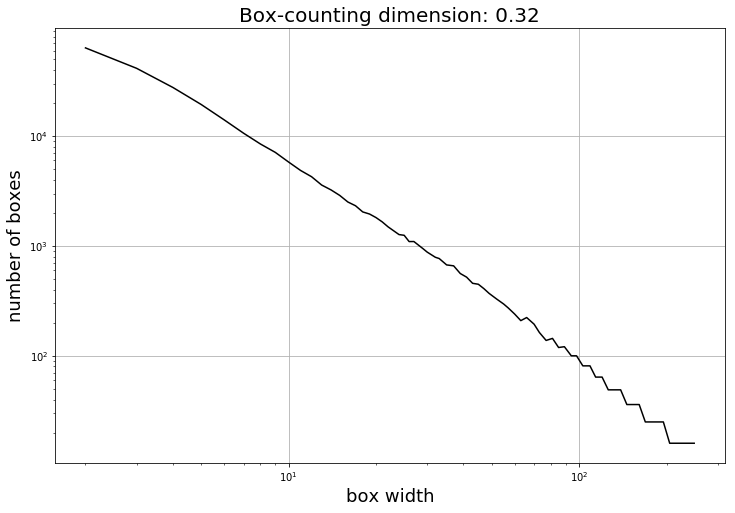

In [17]:
fig = plt.figure(figsize=(12, 8))
plt.loglog(a_boxes, a_nboxes, color='black')
plt.grid()
plt.xlabel('box width', fontsize=fs)
plt.ylabel('number of boxes', fontsize=fs)
plt.title('Box-counting dimension: ' + str(-np.round(db, 2)), fontsize=fs+2)

<font size="4"> 
$\textbf{Recurrence lacunarity:}$
    
    
Select a system and compute its recurrence lacunarity. Parameters must be specified both for generating the recurrence matrix and carrying out the box-counting procedure:

In [18]:
a_ts = a_data[5,]
BC = bc.Boxcount(a_ts, method='frr', thresh=.1, boxes=a_boxes)
# compute box-counts
_, a_lac = BC.lacunarity(regression=None)
# calculate the box-counting dimension using maximum-likelihood regression
alpha = BC.lacunarity(regression='ML')

In [19]:
# confidence intervals:
Nb = 100
l_lac_resmpl = BC.resample_counts(output='lac', Nb=Nb, regression=None)

# compute quantiles:
a_stacked = np.vstack([l_lac_resmpl[n][1] for n in range(Nb)])
a_qlow = np.quantile(a_stacked, .05, axis=0)
a_qhigh = np.quantile(a_stacked, .95, axis = 0)

Text(0.5, 1.0, 'Lacunarity (scaling exponent = 0.7)')

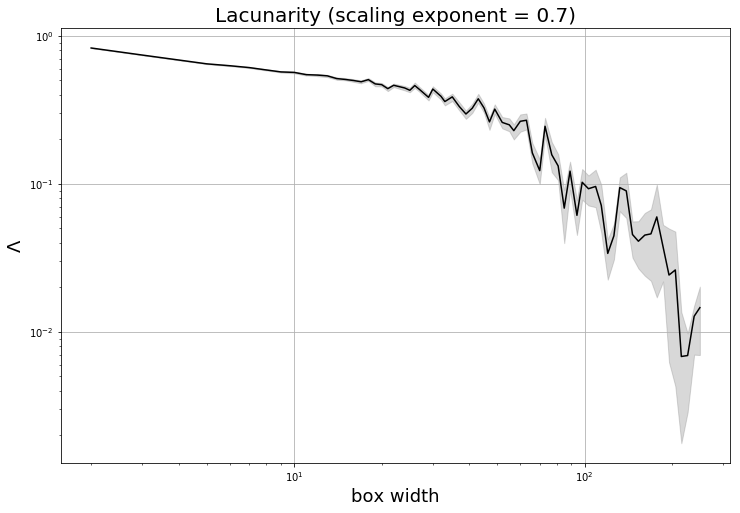

In [20]:
fig = plt.figure(figsize=(12, 8))
plt.loglog(a_boxes, a_lac, color='black')
plt.fill_between(a_boxes, a_qlow, a_qhigh, color='gray', alpha=.3)
plt.grid()
plt.xlabel('box width', fontsize=fs)
plt.ylabel('$\Lambda$', fontsize=fs)
plt.title('Lacunarity (scaling exponent = ' + str(-np.round(alpha, 2)) + ')', fontsize=fs+2)

<font size="4"> 
Compute recurrence lacunarity for all six systems and display the results.

In [10]:
# create a list of RP objects:
l_lac = [bc.Boxcount(a_data[i,], method='frr', thresh=.1, boxes=a_boxes).lacunarity(None, normalized=True)[1] for i in range(6)]
# the Roessler time series needs to be embedded:
l_lac[2] = bc.Boxcount(a_data[2,], method='frr', thresh=.1, dim=3, tau=14, boxes=a_boxes).lacunarity(None, normalized=True)[1]

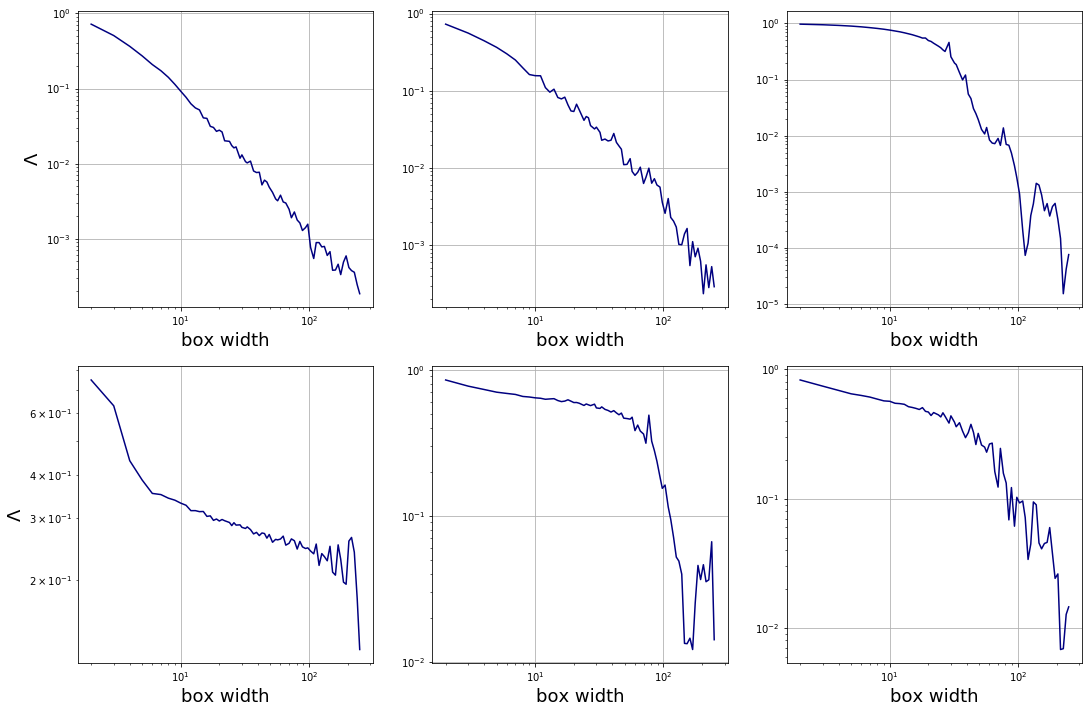

In [9]:
fig, ax_array = plt.subplots(2, 3, squeeze=False, figsize=(18, 12))
k = 0
for i, ax_row in enumerate(ax_array):
    for j, axes in enumerate(ax_row):
        axes.loglog(a_boxes, l_lac[k], color='navy')
        axes.grid()
        axes.set_xlabel("box width", fontsize=fs)
        if k == 0 or k == 3: axes.set_ylabel("$\Lambda$", fontsize=fs)
        k += 1
plt.show()